In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib as mpl
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# Шаг 1: Загрузка данных и описание
data = pd.read_csv("ecommerce_data.csv", encoding='latin1')

# нам важно понимать и описать:
**Состав и сбор данных**

− какие данные и откуда их брать, доступный объём;

− априорные знания о данных: структура, зависимости, аномалии;

− результаты первичного анализа данных.

In [ ]:
#смотрим оформление данных и основную информацию
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [ ]:
data.info() #видим неполные данные в Description, CustomerID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86671 entries, 0 to 86670
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    86671 non-null  object 
 1   StockCode    86671 non-null  object 
 2   Description  86394 non-null  object 
 3   Quantity     86671 non-null  int64  
 4   InvoiceDate  86671 non-null  object 
 5   UnitPrice    86671 non-null  float64
 6   CustomerID   55161 non-null  float64
 7   Country      86671 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 5.3+ MB


In [ ]:
#3
pd.isna(data) #отметим неполные данные

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
86666,False,False,False,False,False,False,False,False
86667,False,False,False,False,False,False,False,False
86668,False,False,False,False,False,False,False,False
86669,False,False,False,False,False,False,False,False


In [ ]:
#4
pd.isna(data).sum() #посчтием кол-во неполных данных
#видим что основные пропуски в Description и CustomerID. Что делать?
#если с описанием -еще худо-бедно можно попробовать по цене товара попробовать подставить,  а с CustomerID? есть идеи
#
#Сделаем кластеризацию данных

InvoiceNo          0
StockCode          0
Description      404
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     42971
Country            1
dtype: int64

In [ ]:
# Определение признаков для анализа
features = ['Quantity', 'UnitPrice']

# Стандартизация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
scaled_data = imputer.fit_transform(scaled_data)

# Кластеризация данных
kmeans = KMeans(n_clusters=3)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Получение уникальных идентификаторов клиентов
unique_customer_ids = data['CustomerID'].unique()


print("Результаты кластеризации:")
print(f"Количество кластеров: {len(data['Cluster'].unique())}")
print("Первые 10 идентификаторов клиентов:")
for customer_id in unique_customer_ids[:10]:
    print(customer_id)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Результаты кластеризации:
Количество кластеров: 3
Первые 10 идентификаторов клиентов:
17850.0
13047.0
12583.0
13748.0
15100.0
15291.0
14688.0
17809.0
15311.0
14527.0


In [ ]:
data.iloc[35000]

InvoiceNo                     539434
StockCode                      22262
Description    FELT EGG COSY CHICKEN
Quantity                           1
InvoiceDate         17-12-2010 14:41
UnitPrice                       1.66
CustomerID                       NaN
Country               United Kingdom
Cluster                            0
Name: 35000, dtype: object

In [ ]:
#5 хочу посмотреть эти нулевые строки по условиям ?
# нам тут важно бы понять - есть ли данные по UnitPrice и Quantity для подсчета выручки


# Выбираем строки, в которых значения столбцов 'CustomerID' или 'Description' являются NaN
# и при этом значения в столбцах 'UnitPrice' и 'Quantity' не являются NaN
missing_data = data[(data['CustomerID'].isna() | data['Description'].isna()) & (~data['UnitPrice'].isna()) & (~data['Quantity'].isna())]

# Выводим эти строки
print(missing_data)


      InvoiceNo StockCode                       Description  Quantity  \
622      536414     22139                               NaN        56   
1443     536544     21773   DECORATIVE ROSE BATHROOM BOTTLE         1   
1444     536544     21774   DECORATIVE CATS BATHROOM BOTTLE         2   
1445     536544     21786                POLKADOT RAIN HAT          4   
1446     536544     21787             RAIN PONCHO RETROSPOT         2   
...         ...       ...                               ...       ...   
86460    543546    84971S         SMALL HEART FLOWERS HOOK          2   
86461    543546     84978  HANGING HEART JAR T-LIGHT HOLDER         5   
86462    543546    85032A     ROMANTIC IMAGES GIFT WRAP SET         2   
86463    543546    85032B      BLOSSOM IMAGES GIFT WRAP SET         1   
86513    543552     22847                               NaN       -10   

            InvoiceDate  UnitPrice  CustomerID         Country  Cluster  
622    01-12-2010 11:52       0.00         NaN  U

In [ ]:
#6
data.describe() # видим аномалии в min значениях в столбцах Quantity, UnitPrice

,Quantity,UnitPrice,CustomerID,Cluster
count,86671.000000,86671.000000,55161.000000,86671.000000
mean,8.534631,5.444620,15347.885191,0.000150
std,360.840360,126.985279,1771.936495,0.016983
min,-74215.000000,0.000000,12346.000000,0.000000
25%,1.000000,1.250000,13862.000000,0.000000
50%,3.000000,2.510000,15311.000000,0.000000
75%,8.000000,4.250000,17001.000000,0.000000
max,74215.000000,16888.020000,18283.000000,2.000000


# Проверяем:

- проведен предварительный анализ данных, наглядно описаны
данные, их качество, аномалии, зависимости?

- описаны и обоснованы алгоритмы и техники, применяемые для
решения задачи, их требования к исходным данным?

- сформирован дизайн отчетности по бизнес-задаче, выбрана
форма представления итоговых результатов?

# 3. Методика решения
- описаны шаги преобразования и очистки данных
- в результате очистки данных найденные ранее аномалии и
зависимости устранены или существенно снижены, качество
данных повышено
- обоснован выбор методов работы с данными и метрик для
решения бизнес-задачи, построена система метрик,
соответствующая содержанию исходной задачи
- описана модель данных и преобразования

уже на этом этапе нам бы разбить на два датасета - с аномалиями и без (с полными данными)

In [ ]:
# Шаг 2: Очистка и подготовка данных
# Удаление дубликатов
data.drop_duplicates(inplace=True)

# Преобразование столбца 'InvoiceDate' в формат datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')

# Обработка отсутствующих значений
data.dropna(subset=['Description'], inplace=True)
data['CustomerID'] = data['CustomerID'].fillna(0)

In [ ]:
# Шаг 3: Разведочный анализ данных
# Базовая статистика
print(data.info())
print(data.describe())

# Проверка на отсутствующие значения
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85587 entries, 0 to 86670
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    85587 non-null  object        
 1   StockCode    85587 non-null  object        
 2   Description  85587 non-null  object        
 3   Quantity     85587 non-null  int64         
 4   InvoiceDate  85587 non-null  datetime64[ns]
 5   UnitPrice    85587 non-null  float64       
 6   CustomerID   85587 non-null  float64       
 7   Country      85587 non-null  object        
 8   Cluster      85587 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 6.2+ MB
None
           Quantity     UnitPrice    CustomerID       Cluster
count  85587.000000  85587.000000  85587.000000  85587.000000
mean       8.530466      5.488283   9743.011614      0.000152
std      362.422933    127.786068   7517.808942      0.017090
min   -74

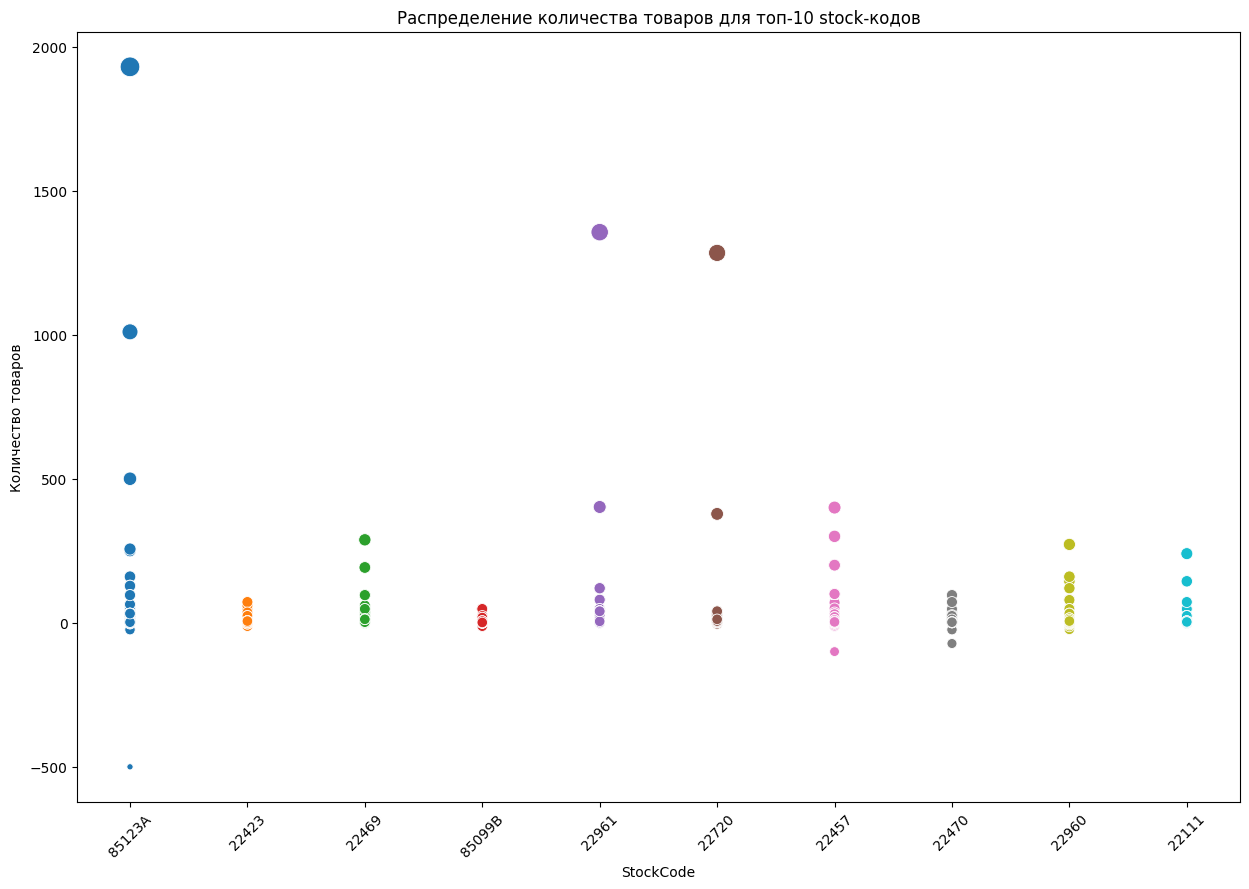

In [ ]:
# Визуализация данных
plt.figure(figsize=(15, 10))
top_stock_codes = data['StockCode'].value_counts().nlargest(10)  # Выбираем топ-10 сток-кодов
top_stock_codes_data = data[data['StockCode'].isin(top_stock_codes.index)]  # Фильтруем данные по топ-10 сток-кодам
sns.scatterplot(data=top_stock_codes_data, x='StockCode', y='Quantity', size='Quantity', hue='StockCode', sizes=(20, 200), legend=False)
plt.title('Распределение количества товаров для топ-10 stock-кодов')
plt.xlabel('StockCode')
plt.ylabel('Количество товаров')
plt.xticks(ticks=range(len(top_stock_codes)), labels=top_stock_codes.index, rotation=45)
plt.show()


<Figure size 1500x1000 with 0 Axes>

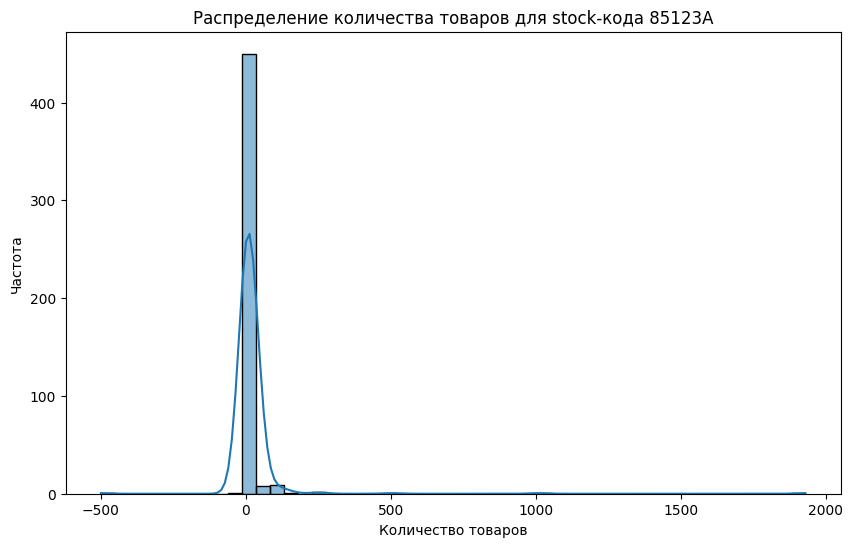

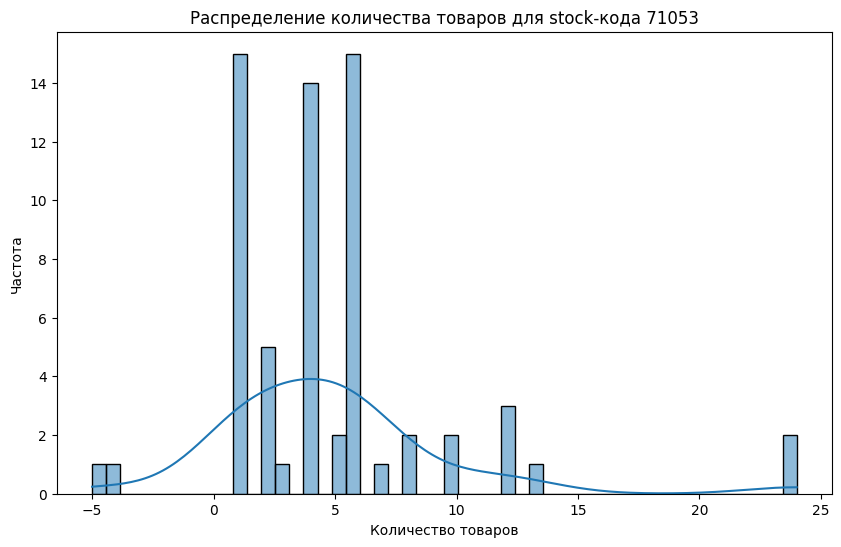

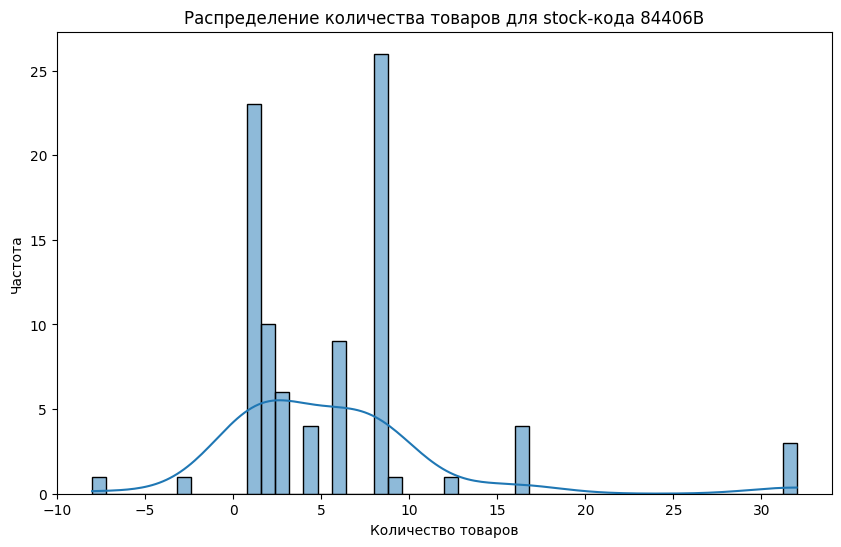

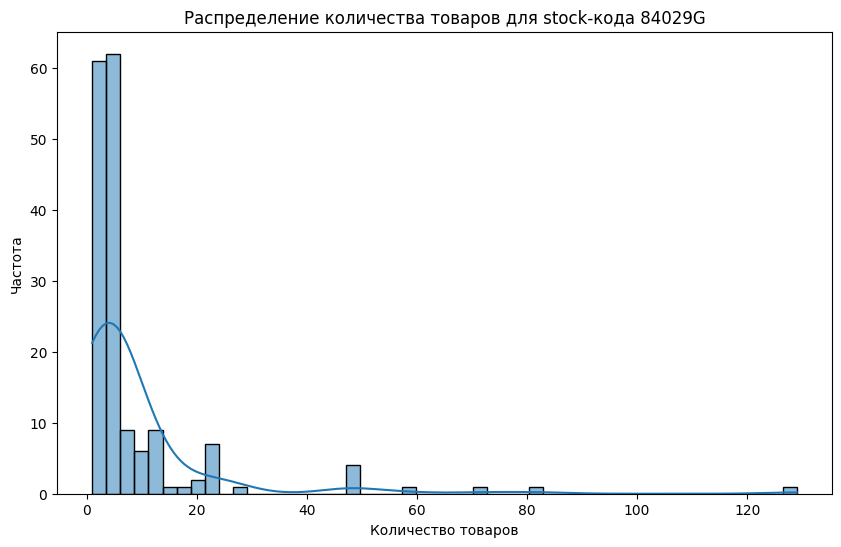

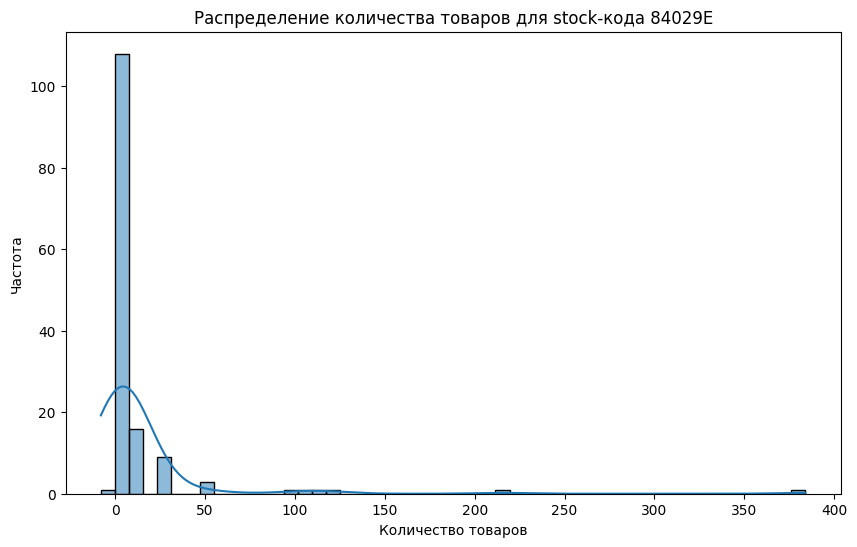

In [ ]:
# Шаг 4: Визуализация данных
# Построение графика распределения количества товаров в заказах для каждого stock-кода
unique_stock_codes = data['StockCode'].unique()[:5]  # Выбираем первые 10 уникальных stock-кодов
plt.figure(figsize=(15, 10))
for stock_code in unique_stock_codes:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[data['StockCode'] == stock_code]['Quantity'], bins=50, kde=True)
    plt.title(f'Распределение количества товаров для stock-кода {stock_code}')
    plt.xlabel('Количество товаров')
    plt.ylabel('Частота')
    plt.show()

#Поправил теперь выводится нескольок графиков, а не все

#



In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Создаем столбец с годом и месяцем
data['InvoiceYearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Исключаем декабрь из анализа
data = data[data['InvoiceYearMonth'].dt.month != 12]

# Группируем данные по месяцам и суммируем количество товаров
monthly_sales = data.groupby('InvoiceYearMonth')['Quantity'].sum()

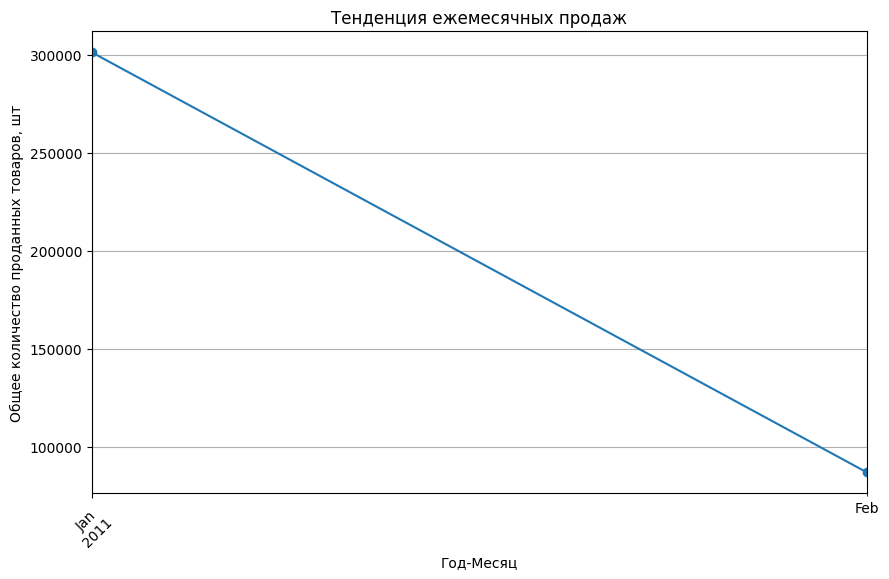

In [ ]:
# Построение тенденции продаж со временем
# Строим график
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o')
plt.title('Тенденция ежемесячных продаж')
plt.xlabel('Год-Месяц')
plt.ylabel('Общее количество проданных товаров, шт')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#оставляем, добро


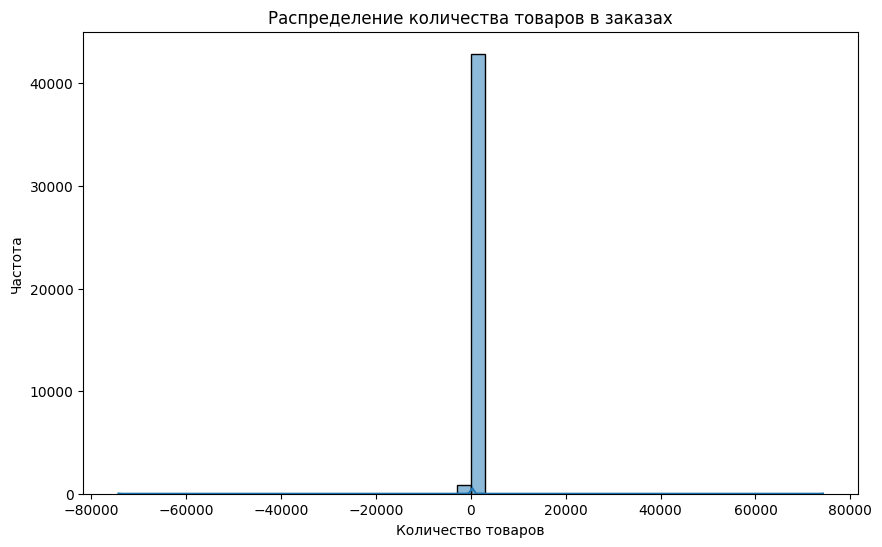

In [ ]:
# График распределения количества товаров в заказах
plt.figure(figsize=(10, 6))
sns.histplot(data['Quantity'], bins=50, kde=True)
plt.title('Распределение количества товаров в заказах')
plt.xlabel('Количество товаров')
plt.ylabel('Частота')
plt.show()

#воооот, тот самый 0-кастомер, портит всю картину, поэтому разбить на 2 сета надо раньше(Исправить никак не удается, пока буду работать над этим)

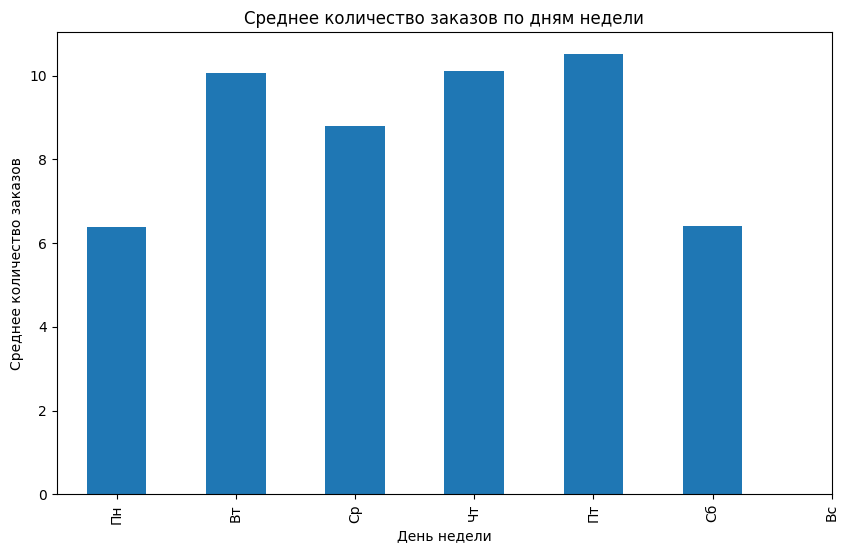

In [ ]:
# Преобразуем столбец 'InvoiceDate' в тип данных datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Создаем столбец 'DayOfWeek' на основе 'InvoiceDate'
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek

# Группировка данных по дням недели и вычисление среднего количества заказов
mean_orders_per_day = data.groupby('DayOfWeek')['Quantity'].mean()

# Визуализация среднего количества заказов по дням недели
plt.figure(figsize=(10, 6))
mean_orders_per_day.plot(kind='bar')
plt.title('Среднее количество заказов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество заказов')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()



#годится, а можно вывести средние данные продаж по дням? воскресенье выпадает без продаж- странный сет достался(Исправил)

In [ ]:
# Преобразование столбца с датой в формат datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Группировка данных по дате и подсчет количества покупок
daily_purchases = data.groupby(data['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()

# Получение пиков и впадин
doublediff = np.diff(np.sign(np.diff(daily_purchases['Quantity'].values)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1 * daily_purchases['Quantity'].values)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Рисование графика
plt.figure(figsize = (30,18), dpi=500)
plt.plot('InvoiceDate', 'Quantity', data=daily_purchases, color='tab:blue', label='Количество покупок')
plt.scatter(daily_purchases['InvoiceDate'].iloc[peak_locations], daily_purchases['Quantity'].iloc[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Пики')
plt.scatter(daily_purchases['InvoiceDate'].iloc[trough_locations], daily_purchases['Quantity'].iloc[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Впадины')

# Аннотации
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(daily_purchases['InvoiceDate'].iloc[p], daily_purchases['Quantity'].iloc[p]+15, str(daily_purchases['InvoiceDate'].iloc[p]), horizontalalignment='center', color='darkgreen')
    plt.text(daily_purchases['InvoiceDate'].iloc[t], daily_purchases['Quantity'].iloc[t]-35, str(daily_purchases['InvoiceDate'].iloc[t]), horizontalalignment='center', color='darkred')

# Оформление
plt.title("Пики и впадины количества покупок", fontsize=22)
plt.xlabel("Дата", fontsize=18)
plt.ylabel("Количество покупок", fontsize=18)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=.3)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


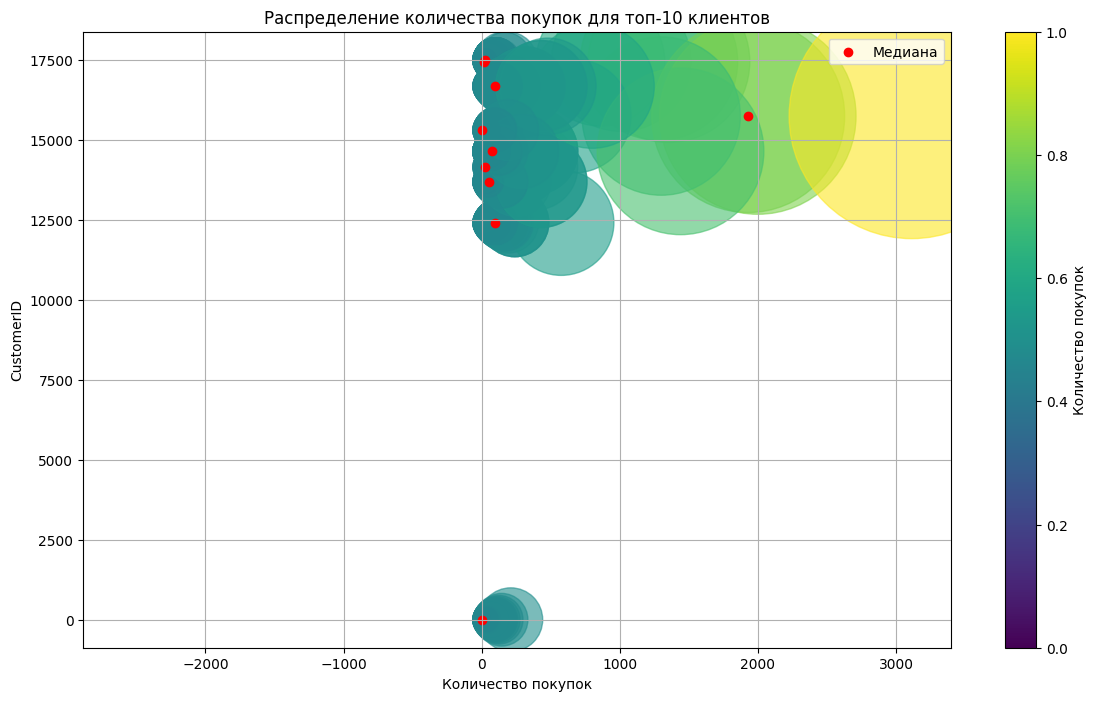

In [ ]:
# Выбор топ-10 клиентов по суммарному количеству покупок
top_customers = data.groupby('CustomerID')['Quantity'].sum().nlargest(10)

# Подготовка данных для графика
customer_data = data[data['CustomerID'].isin(top_customers.index)]
customer_data_median = customer_data.groupby('CustomerID')['Quantity'].median()

# Распределенная точечная диаграмма
plt.figure(figsize=(14, 8))
plt.scatter(y=customer_data['CustomerID'], x=customer_data['Quantity'],
            s=customer_data['Quantity']*10, alpha=0.6, c=customer_data['Quantity'], cmap='viridis')

# Добавление медианы
plt.scatter(y=customer_data_median.index, x=customer_data_median.values, color='red', marker='o', label='Медиана')

# Оформление
plt.title('Распределение количества покупок для топ-10 клиентов')
plt.xlabel('Количество покупок')
plt.ylabel('CustomerID')
plt.colorbar(label='Количество покупок')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Шаг 5: Анализ продаж и создание модели прогнозирования
# Создание признаков для анализа временных рядов продаж
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour


In [ ]:
# Аналитика: топ-стран по количеству покупателей
top_countries_customers = data.groupby('Country')['CustomerID'].nunique().nlargest(10)
print("\nТоп-10 стран по количеству покупателей:")
print(top_countries_customers)

# Аналитика: топ-стран по количеству заказов
top_countries_orders = data.groupby('Country')['InvoiceNo'].nunique().nlargest(10)
print("\nТоп-10 стран по количеству заказов:")
print(top_countries_orders)

# аналитика - ок, а можно графичков добавить?)) мне ж визуал еще нужен
# есть какие-нибудь прям чтоб пушка-бомба-ракета?))



Топ-10 стран по количеству покупателей:
Country
United Kingdom    843
Germany            33
France             28
Spain              10
Australia           7
Belgium             6
Portugal            4
Switzerland         4
EIRE                3
Italy               3
Name: CustomerID, dtype: int64

Топ-10 стран по количеству заказов:
Country
United Kingdom    1577
Germany             57
France              45
EIRE                14
Spain               14
Australia           13
Netherlands          9
Belgium              8
Italy                5
Portugal             5
Name: InvoiceNo, dtype: int64


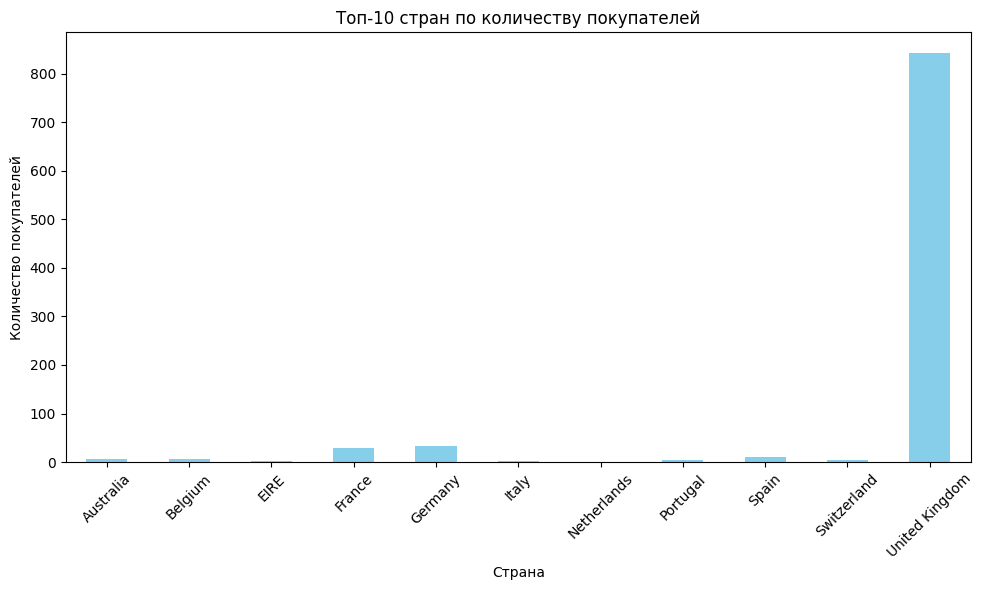

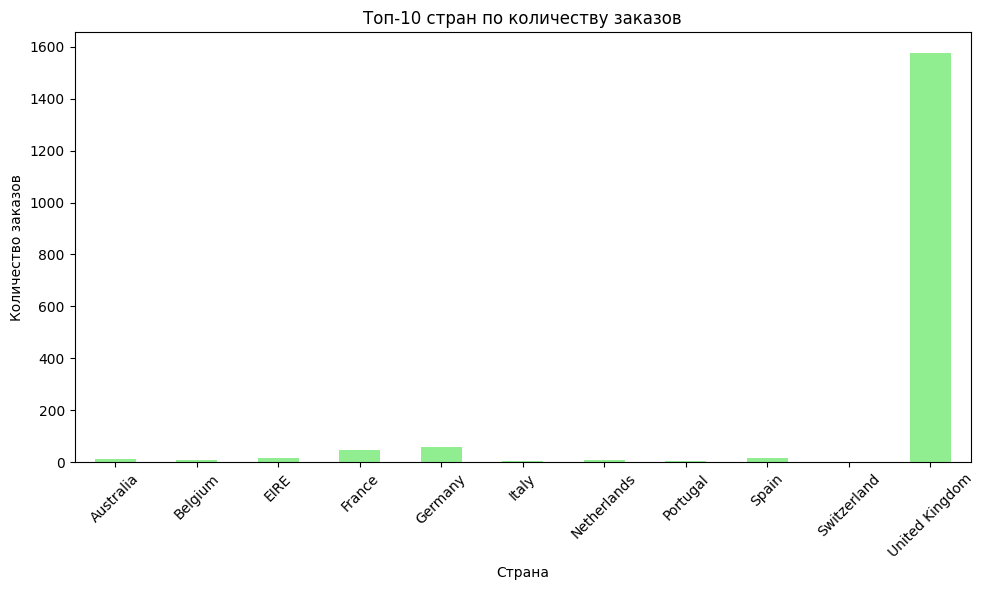

In [ ]:
# Для удобства можно объединить данные в один датафрейм
top_countries = pd.DataFrame({
    'Количество покупателей': top_countries_customers,
    'Количество заказов': top_countries_orders
})

# Построение графика для топ-10 стран по количеству покупателей
plt.figure(figsize=(10, 6))
top_countries['Количество покупателей'].plot(kind='bar', color='skyblue')
plt.title('Топ-10 стран по количеству покупателей')
plt.xlabel('Страна')
plt.ylabel('Количество покупателей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Построение графика для топ-10 стран по количеству заказов
plt.figure(figsize=(10, 6))
top_countries['Количество заказов'].plot(kind='bar', color='lightgreen')
plt.title('Топ-10 стран по количеству заказов')
plt.xlabel('Страна')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Добавление столбца с выручкой
data['Revenue'] = data['Quantity'] * data['UnitPrice']

# Аналитика: топ-покупателей по выручке
top_customers_revenue = data.groupby('CustomerID')['Revenue'].sum().nlargest(10)
print("Топ-10 клиентов по выручке:")
print(top_customers_revenue)

# Аналитика: топ по количеству товаров
top_stock_quantity = data.groupby('StockCode')['Quantity'].sum().nlargest(10)
print("\nТоп-10 товаров по количеству:")
print(top_stock_quantity)

# Аналитика: топ по количеству заказов
top_orders_quantity = data.groupby('InvoiceNo').size().nlargest(10)
print("\nТоп-10 заказов по количеству:")
print(top_orders_quantity)


# и сюда графичков


Топ-10 клиентов по выручке:
CustomerID
0.0        113819.52
14646.0     27737.96
15749.0     22998.40
17450.0     18620.20
14156.0     17562.78
18102.0     10535.48
17511.0      8210.32
15311.0      7738.51
14088.0      7544.91
12415.0      7092.98
Name: Revenue, dtype: float64

Топ-10 товаров по количеству:
StockCode
85123A    6339
84077     4329
21212     3967
85099B    3756
22469     3407
17003     3289
21108     3261
21985     2962
21175     2530
84879     2358
Name: Quantity, dtype: int64

Топ-10 заказов по количеству:
InvoiceNo
540551    502
540848    460
541421    455
541827    429
540977    418
541592    415
540026    410
540821    406
541695    403
541423    402
dtype: int64


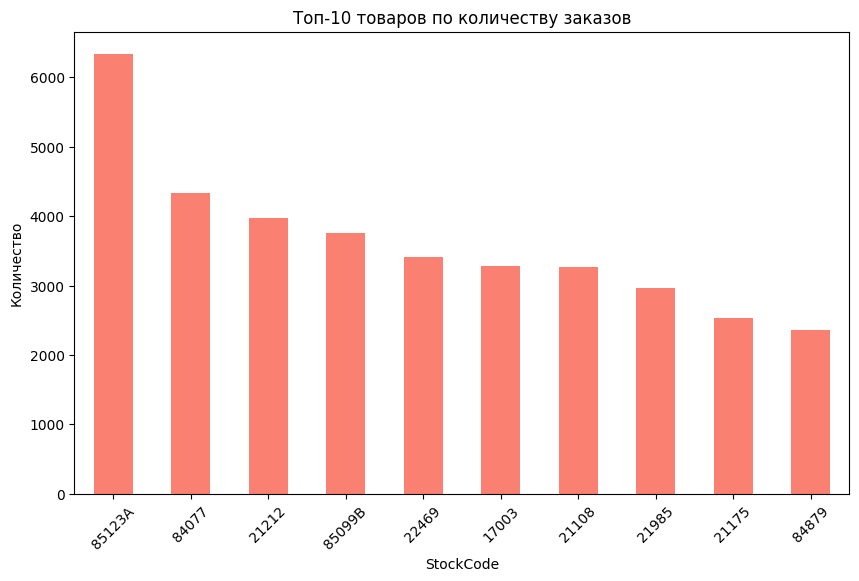

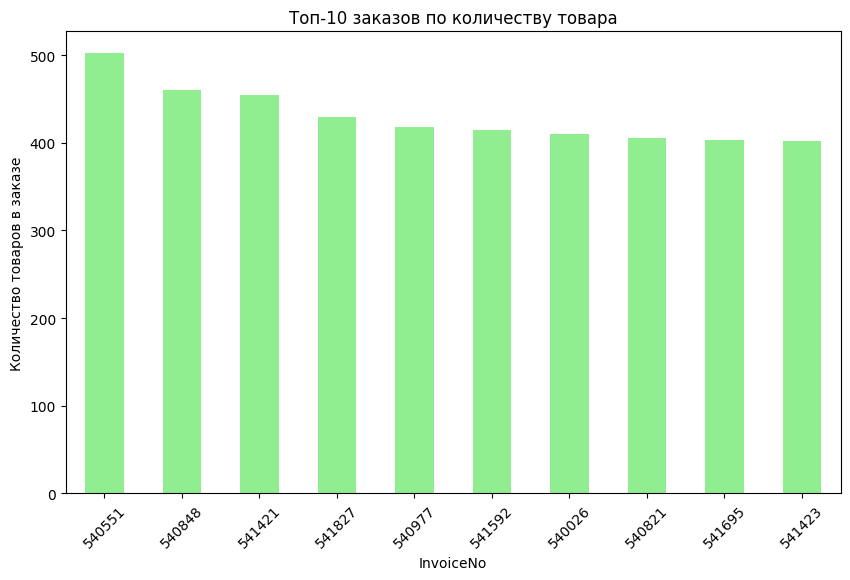

In [ ]:
# График топ-10 товаров по количеству заказов
plt.figure(figsize=(10, 6))
top_stock_quantity.plot(kind='bar', color='salmon')
plt.title('Топ-10 товаров по количеству заказов')
plt.xlabel('StockCode')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

# График топ-10 заказов по количеству товара
plt.figure(figsize=(10, 6))
top_orders_quantity.plot(kind='bar', color='lightgreen')
plt.title('Топ-10 заказов по количеству товара')
plt.xlabel('InvoiceNo')
plt.ylabel('Количество товаров в заказе')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Топ-товары по заказам (чаще всего заказываемые товары)
top_stock_orders = data.groupby('StockCode')['InvoiceNo'].nunique().nlargest(10)
print("\nТоп-10 товаров по заказам (чаще всего заказываемые товары):")
print(top_stock_orders)

# Топ-товары по количеству проданных единиц
top_stock_quantity_sold = data.groupby('StockCode')['Quantity'].sum().nlargest(10)
print("\nТоп-10 товаров по количеству проданных единиц:")
print(top_stock_quantity_sold)

# Топ-товары по выручке
top_stock_revenue = data.groupby('StockCode')['Revenue'].sum().nlargest(10)
print("\nТоп-10 товаров по выручке:")
print(top_stock_revenue)


# и сюда графичков


Топ-10 товаров по заказам (чаще всего заказываемые товары):
StockCode
85123A    237
22423     203
22720     202
22469     187
85099B    175
22457     158
84378     149
22470     137
22722     137
20725     134
Name: InvoiceNo, dtype: int64

Топ-10 товаров по количеству проданных единиц:
StockCode
85123A    6339
84077     4329
21212     3967
85099B    3756
22469     3407
17003     3289
21108     3261
21985     2962
21175     2530
84879     2358
Name: Quantity, dtype: int64

Топ-10 товаров по выручке:
StockCode
DOT       18351.74
85123A    17414.67
22423     14082.95
85099B     6934.98
21108      6915.89
21623      6691.47
22470      6385.47
POST       6344.88
79321      6304.45
22720      6190.67
Name: Revenue, dtype: float64


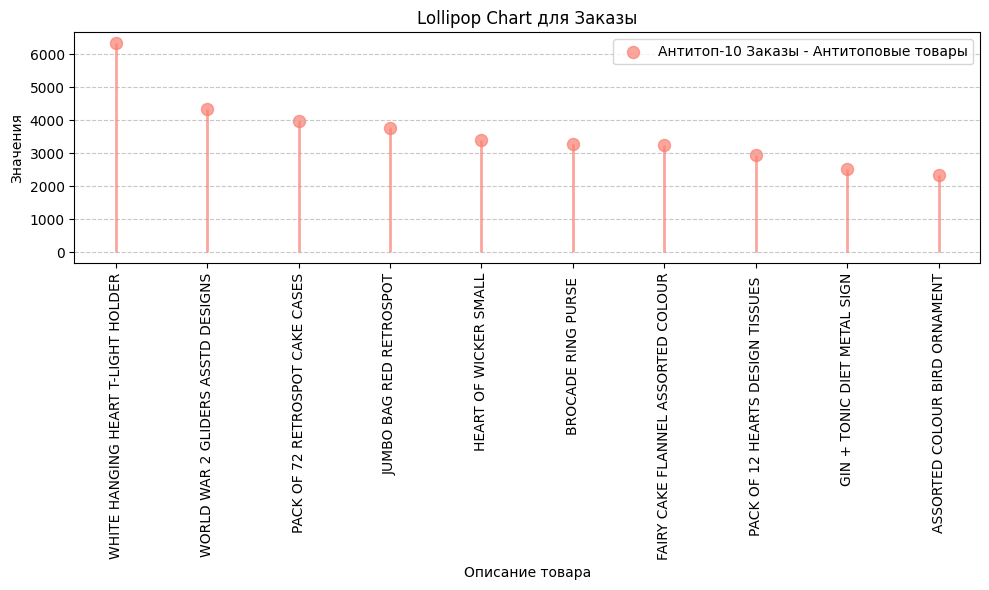

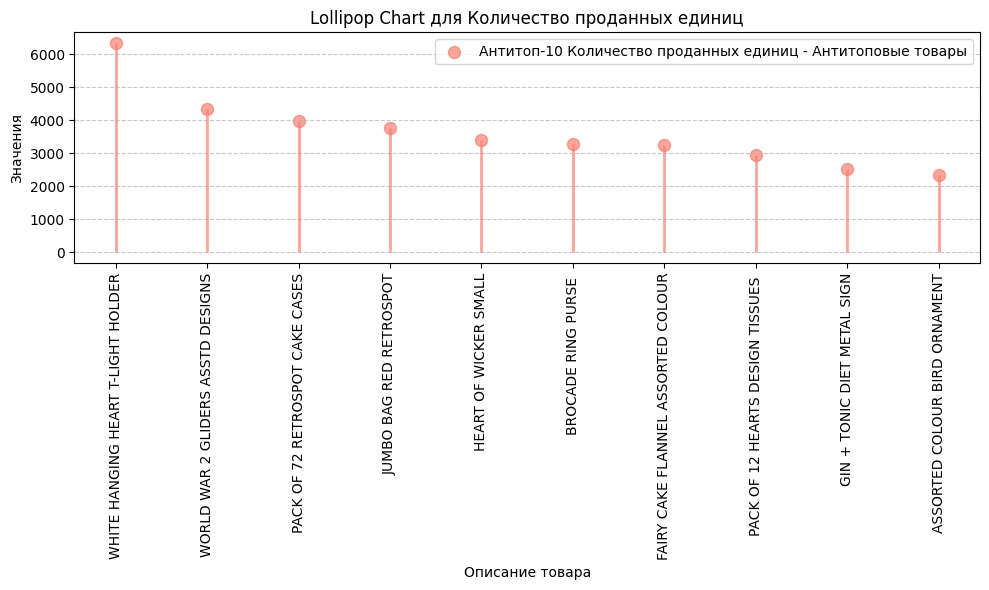

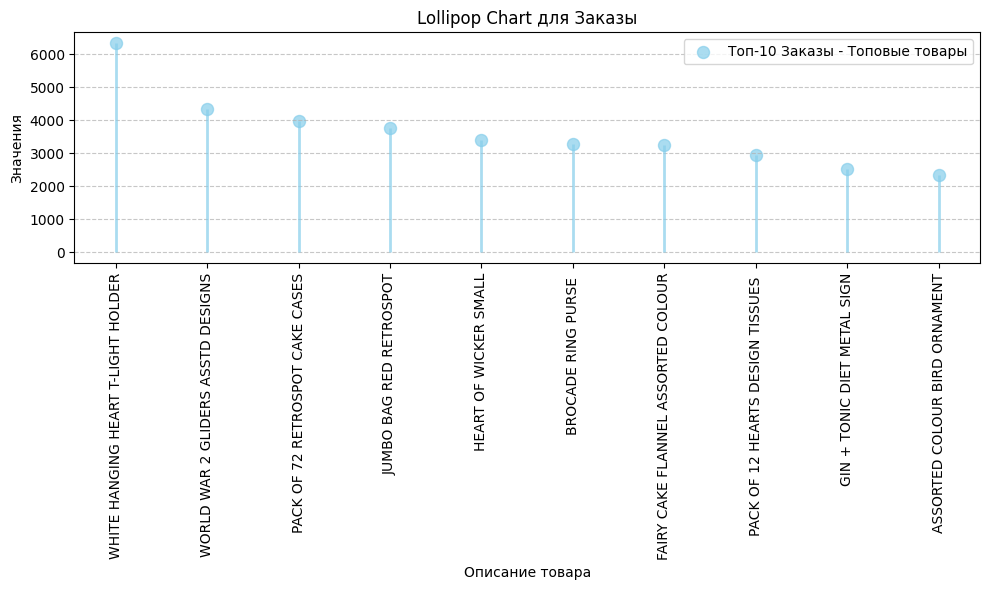

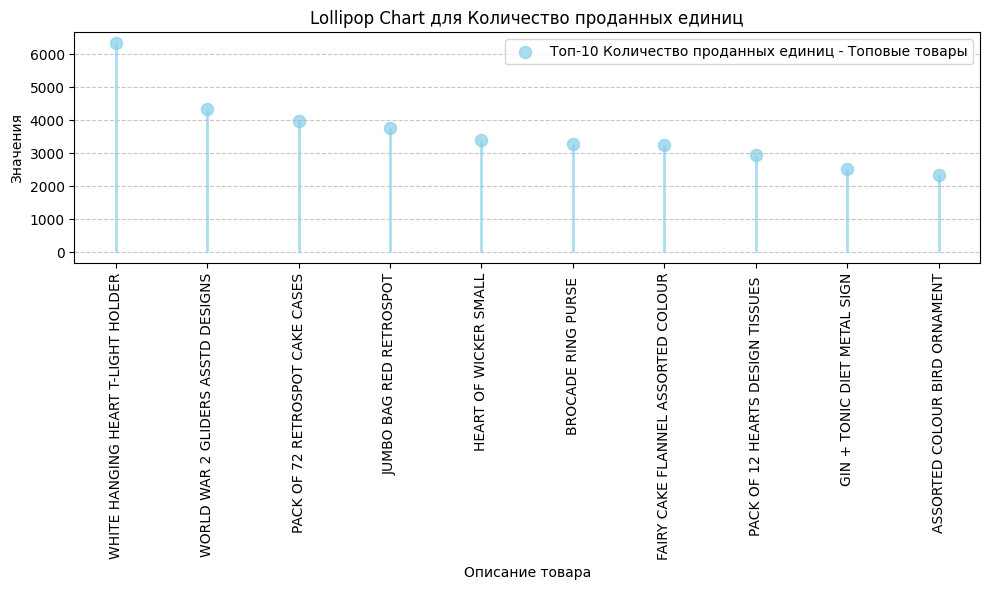

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Функция для построения графиков Lollipop для топовых и антитоповых товаров
def plot_top_and_bottom_lollipop(data, descriptions, title, top_desc, bottom_desc):
    plt.figure(figsize=(10, 6))

    # График для антитоповых товаров
    plt.vlines(x=descriptions, ymin=0, ymax=data, color='salmon', alpha=0.7, linewidth=2)
    plt.scatter(x=descriptions, y=data, s=75, color='salmon', alpha=0.7, label="Антитоп-10 " + title + " - " + bottom_desc)

    plt.title('Lollipop Chart для ' + title)
    plt.xlabel('Описание товара')
    plt.ylabel('Значения')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Функция для построения графика Lollipop для топовых товаров
def plot_top_lollipop(data, descriptions, title, top_desc):
    plt.figure(figsize=(10, 6))

    # График для топовых товаров
    plt.vlines(x=descriptions, ymin=0, ymax=data, color='skyblue', alpha=0.7, linewidth=2)
    plt.scatter(x=descriptions, y=data, s=75, color='skyblue', alpha=0.7, label="Топ-10 " + title + " - " + top_desc)

    plt.title('Lollipop Chart для ' + title)
    plt.xlabel('Описание товара')
    plt.ylabel('Значения')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



# Группировка данных по описаниям товаров и суммирование количества проданных единиц
top_stock_orders = data.groupby('Description')['Quantity'].sum().nlargest(10)
top_stock_quantity_sold = data.groupby('Description')['Quantity'].sum().nlargest(10)
descriptions = top_stock_orders.index.tolist()



# Построение графиков для топовых и антитоповых товаров по заказам
plot_top_and_bottom_lollipop(top_stock_orders, descriptions, 'Заказы', 'Топовые товары', 'Антитоповые товары')

# Построение графиков для топовых и антитоповых товаров по количеству проданных единиц
plot_top_and_bottom_lollipop(top_stock_quantity_sold, descriptions, 'Количество проданных единиц', 'Топовые товары', 'Антитоповые товары')

# Построение графика для топовых товаров по заказам
plot_top_lollipop(top_stock_orders, descriptions, 'Заказы', 'Топовые товары')

# Построение графика для топовых товаров по количеству проданных единиц
plot_top_lollipop(top_stock_quantity_sold, descriptions, 'Количество проданных единиц', 'Топовые товары')


In [ ]:
# Создание датасета с аномалиями
anomalies_data = data[(data['UnitPrice'] <= 0) | (data['Revenue'] < 0)]

# Создание датасета без аномалий
clean_data = data.drop(anomalies_data.index)

# Анализ датасета с аномалиями
print("Анализ данных с аномалиями:")
print(anomalies_data.describe())

# Анализ датасета без аномалий
print("\nАнализ данных без аномалий:")
print(clean_data.describe())


Анализ данных с аномалиями:
           Quantity     UnitPrice    CustomerID     Cluster   DayOfWeek  \
count    856.000000    856.000000    856.000000  856.000000  856.000000   
mean    -103.990654     50.926624  13787.028037    0.005841    2.393692   
std     2538.943751    810.244803   3899.762298    0.102431    1.590294   
min   -74215.000000      0.000000      0.000000    0.000000    0.000000   
25%       -6.000000      1.450000  13081.000000    0.000000    1.000000   
50%       -2.000000      2.950000  14295.000000    0.000000    2.000000   
75%       -1.000000      4.950000  15823.000000    0.000000    4.000000   
max      144.000000  16888.020000  18277.000000    2.000000    6.000000   

         Year       Month         Day        Hour       Revenue  
count   856.0  856.000000  856.000000  856.000000    856.000000  
mean   2011.0    1.151869   15.454439   13.149533   -156.154252  
std       0.0    0.359104    9.645423    2.623524   2757.665198  
min    2011.0    1.000000    1.0

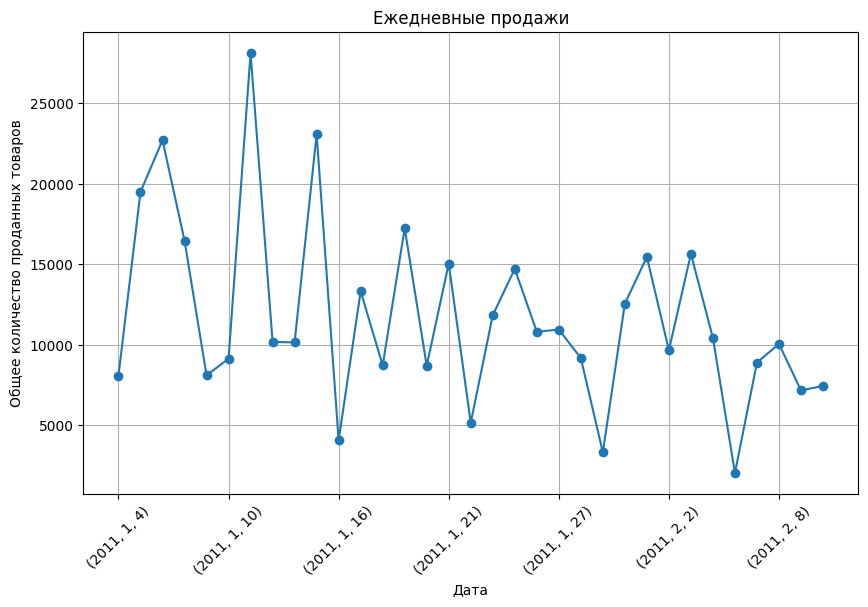

In [ ]:
# Анализ ежедневных продаж
daily_sales = data.groupby(['Year', 'Month', 'Day'])['Quantity'].sum()
plt.figure(figsize=(10, 6))
daily_sales.plot(marker='o')
plt.title('Ежедневные продажи')
plt.xlabel('Дата')
plt.ylabel('Общее количество проданных товаров')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#график - отличный, оставляем

In [ ]:
# Создание столбца с выручкой
data['Revenue'] = data['Quantity'] * data['UnitPrice']

# Топ покупателей по выручке
top_customers_revenue = data.groupby('CustomerID')['Revenue'].sum().nlargest(10)
print("Топ-10 клиентов по выручке:")
print(top_customers_revenue)

# Топ стран по выручке, количеству покупателей и заказов
top_countries_revenue = data.groupby('Country')['Revenue'].sum().nlargest(10)
top_countries_customers = data.groupby('Country')['CustomerID'].nunique().nlargest(10)
top_countries_orders = data.groupby('Country')['InvoiceNo'].nunique().nlargest(10)

print("Топ-10 стран по выручке:")
print(top_countries_revenue)
print("Топ-10 стран по количеству покупателей:")
print(top_countries_customers)
print("Топ-10 стран по количеству заказов:")
print(top_countries_orders)

# Топ товаров по количеству заказов
top_products_by_orders = data.groupby('Description')['InvoiceNo'].nunique().nlargest(10)
print("Топ-10 товаров по количеству заказов:")
print(top_products_by_orders)

# Топ товаров по выручке
top_products_by_revenue = data.groupby('Description')['Revenue'].sum().nlargest(10)
print("Топ-10 товаров по выручке:")
print(top_products_by_revenue)

# Анализ зон пересечения между топ-товарами по заказам и по выручке
intersection_products = top_products_by_orders.index.intersection(top_products_by_revenue.index)
print("Товары, входящие в оба топа:")
print(intersection_products)



Топ-10 клиентов по выручке:
CustomerID
0.0        113819.52
14646.0     27737.96
15749.0     22998.40
17450.0     18620.20
14156.0     17562.78
18102.0     10535.48
17511.0      8210.32
15311.0      7738.51
14088.0      7544.91
12415.0      7092.98
Name: Revenue, dtype: float64
Топ-10 стран по выручке:
Country
United Kingdom    581537.87
Netherlands        28052.09
EIRE               23461.15
France             20548.92
Germany            18606.81
Australia           9209.71
Spain               8846.88
Japan               5671.01
Switzerland         4924.56
Portugal            3998.11
Name: Revenue, dtype: float64
Топ-10 стран по количеству покупателей:
Country
United Kingdom    843
Germany            33
France             28
Spain              10
Australia           7
Belgium             6
Portugal            4
Switzerland         4
EIRE                3
Italy               3
Name: CustomerID, dtype: int64
Топ-10 стран по количеству заказов:
Country
United Kingdom    1577
Germany     

In [ ]:
import pandas as pd

# Создаем DataFrame из данных
df = pd.DataFrame(data)

# Преобразуем столбец InvoiceDate в формат datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

# Добавляем столбец с годом и месяцем в формате 'YYYY-MM'
df['Year_Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)

# Удаление неполного месяца (декабрь 2011)
df = df[df['Year_Month'] != '2011-12']


Корень из среднеквадратичной ошибки (RMSE): 24613.00
Средняя абсолютная ошибка (MAE): 24613.00
Коэффициент детерминации (R^2): nan
Коэффициенты модели:
Коэффициент для 'Year_Month': 4.00
Перехват (intercept): -527856.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


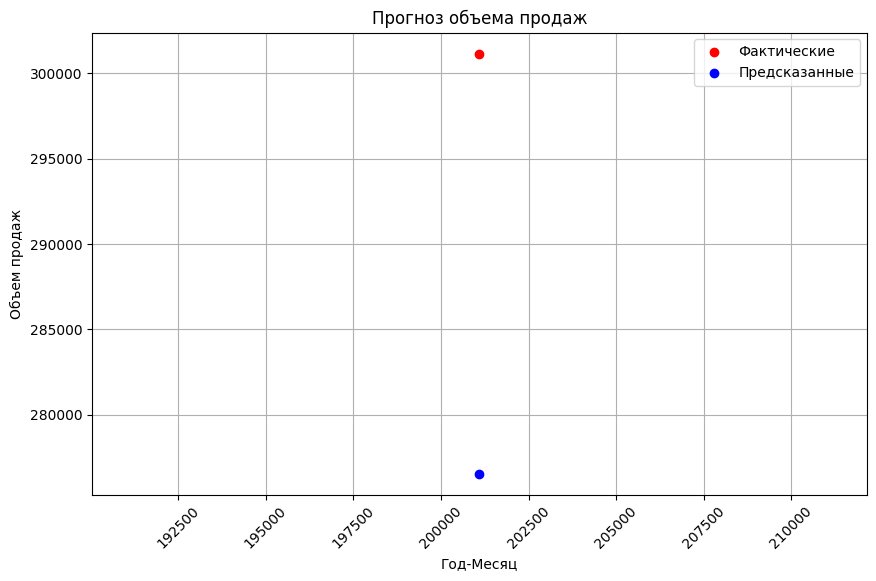

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Предобработка столбца 'Year_Month'
grouped_sales = grouped_data[grouped_data['Year_Month'] != pd.Timestamp('2011-12-01')]


# Убедимся, что DataFrame содержит как минимум две записи
if len(grouped_sales) < 2:
    print("Ошибка: В DataFrame содержится недостаточно данных для вычисления коэффициента детерминации (R^2).")
else:
    # Разделение данных на обучающий и тестовый наборы
    X = grouped_sales['Year_Month'].dt.to_period('M').astype(str)  # Преобразование в период и затем в строку
    y = grouped_sales['Quantity']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Преобразование в numpy массивы и изменение формы для подгонки модели
    X_train = X_train.apply(lambda x: int(x.split('-')[0] + x.split('-')[1]))
    X_test = X_test.apply(lambda x: int(x.split('-')[0] + x.split('-')[1]))
    X_train = X_train.to_numpy().reshape(-1, 1)
    X_test = X_test.to_numpy().reshape(-1, 1)

    # Подгонка модели
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Прогнозирование
    y_pred = model.predict(X_test)

    # Оценка модели
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mean_absolute_error = np.mean(np.abs(y_test - y_pred))  # Средняя абсолютная ошибка
    r2_score_value = r2_score(y_test, y_pred)

    print("Корень из среднеквадратичной ошибки (RMSE): {:.2f}".format(rmse))
    print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mean_absolute_error))
    if len(grouped_sales) >= 2:
        print("Коэффициент детерминации (R^2): {:.2f}".format(r2_score_value))
    else:
        print("Недостаточно данных для вычисления коэффициента детерминации (R^2).")
    print("Коэффициенты модели:")
    print("Коэффициент для 'Year_Month': {:.2f}".format(model.coef_[0]))
    print("Перехват (intercept): {:.2f}".format(model.intercept_))


# Визуализация
plt.figure(figsize=(10, 6))

# Точечный график фактических значений
plt.scatter(X_test, y_test, color='red', label='Фактические')

# Точечный график предсказанных значений
plt.scatter(X_test, y_pred, color='blue', label='Предсказанные')

plt.title('Прогноз объема продаж')
plt.xlabel('Год-Месяц')
plt.ylabel('Объем продаж')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Шаг 6: Генерация рекомендаций
# Исходя из проведенного анализа данных, предлагаем следующие рекомендации для оптимизации бизнес-процессов и маркетинговых стратегий:

# Рекомендация 1: Оптимизация данных и улучшение точности
print("Рекомендация 1: Оптимизация данных и улучшение точности")
print("- Проведите более глубокий анализ причин отрицательных значений количества товаров или возвратов, чтобы выявить и устранить источники ошибок в данных.")
print("- Рассмотрите внедрение системы мониторинга качества данных для предотвращения будущих неточностей.")

# Рекомендация 2: Адаптация ассортимента и маркетинговых стратегий
print("\nРекомендация 2: Адаптация ассортимента и маркетинговых стратегий")
print("- Проведите анализ сезонных трендов и реагируйте на изменения спроса, подстраивая ассортимент и маркетинговые кампании под текущие тенденции.")
print("- Выявите успешные маркетинговые кампании в регионах с ростом продаж и адаптируйте их стратегии для применения на других рынках.")

# Рекомендация 3: Оптимизация операционных процессов
print("\nРекомендация 3: Оптимизация операционных процессов")
print("- Исследуйте возможности для улучшения операционных процессов, таких как управление запасами и логистика, для повышения эффективности и снижения издержек.")
print("- Внедрите инструменты аналитики и прогнозирования спроса для более точного планирования производства и закупок.")



In [ ]:
# Сохранение обновленного набора данных
data.to_csv("cleaned_ecommerce_data.csv", index=False)